In [2]:
import numpy as np
import pandas as pd

In [3]:
demand_dataset = pd.read_csv('H1_Wh.csv')

In [4]:
demand_dataset.shape

(527039, 8)

In [5]:
demand_dataset.head()

,date,Discharge(Wh),Charge(Wh),Production(Wh),Consumption(Wh),Feed-in(Wh),From grid(Wh),State of Charge(%)
0,01/01/2020 01:01,0.0,0.13,0.0,1.58,0.0,1.71,0.0
1,01/01/2020 01:02,0.0,0.13,0.0,1.58,0.0,1.71,0.0
2,01/01/2020 01:03,0.0,0.13,0.0,1.57,0.0,1.70,0.0
3,01/01/2020 01:04,0.0,0.13,0.0,1.55,0.0,1.68,0.0
4,01/01/2020 01:05,0.0,0.13,0.0,1.55,0.0,1.68,0.0


In [6]:
demand_dataset.columns

Index(['date', ' Discharge(Wh)', ' Charge(Wh)', ' Production(Wh)',
       ' Consumption(Wh)', ' Feed-in(Wh)', ' From grid(Wh)',
       ' State of Charge(%)'],
      dtype='object')

In [7]:
demand_dataset.columns = demand_dataset.columns.str.strip()

In [8]:
demand_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527039 entries, 0 to 527038
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   date                527039 non-null  object 
 1   Discharge(Wh)       527039 non-null  float64
 2   Charge(Wh)          527039 non-null  float64
 3   Production(Wh)      527039 non-null  float64
 4   Consumption(Wh)     527039 non-null  float64
 5   Feed-in(Wh)         527039 non-null  float64
 6   From grid(Wh)       527039 non-null  float64
 7   State of Charge(%)  527039 non-null  float64
dtypes: float64(7), object(1)
memory usage: 32.2+ MB


In [9]:
demand_dataset = demand_dataset[(demand_dataset[['Discharge(Wh)', 'Charge(Wh)', 'Production(Wh)', 'Feed-in(Wh)', 'State of Charge(%)']] != 0).any(axis=1)]

In [10]:
demand_dataset.shape

(525366, 8)

In [11]:
demand_dataset['date'] = pd.to_datetime(demand_dataset['date'], dayfirst=True)
# demand_dataset.set_index('date', inplace=True)

In [12]:
demand_dataset.head()

,date,Discharge(Wh),Charge(Wh),Production(Wh),Consumption(Wh),Feed-in(Wh),From grid(Wh),State of Charge(%)
0,2020-01-01 01:01:00,0.0,0.13,0.0,1.58,0.0,1.71,0.0
1,2020-01-01 01:02:00,0.0,0.13,0.0,1.58,0.0,1.71,0.0
2,2020-01-01 01:03:00,0.0,0.13,0.0,1.57,0.0,1.70,0.0
3,2020-01-01 01:04:00,0.0,0.13,0.0,1.55,0.0,1.68,0.0
4,2020-01-01 01:05:00,0.0,0.13,0.0,1.55,0.0,1.68,0.0


In [13]:
demand_dataset['date'] = pd.to_datetime(demand_dataset['date'])
demand_dataset.set_index('date', inplace=True)

In [14]:
hourly_dataset = demand_dataset.resample('H').agg({
    'Discharge(Wh)': 'sum',
    'Charge(Wh)': 'sum',
    'Production(Wh)': 'sum',
    'Consumption(Wh)': 'sum',
    'Feed-in(Wh)': 'sum',
    'From grid(Wh)': 'sum',
    'State of Charge(%)': 'first'  # Take the first entry for each hour
}).reset_index()

C:\Users\USER\AppData\Local\Temp\ipykernel_26308\186686322.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_dataset = demand_dataset.resample('H').agg({


In [15]:
hourly_dataset.head()

,date,Discharge(Wh),Charge(Wh),Production(Wh),Consumption(Wh),Feed-in(Wh),From grid(Wh),State of Charge(%)
0,2020-01-01 01:00:00,0.0,7.67,0.0,96.21,0.0,103.88,0.0
1,2020-01-01 02:00:00,0.0,7.80,0.0,41.13,0.0,48.93,0.0
2,2020-01-01 03:00:00,0.0,8.34,0.0,80.93,0.0,89.27,0.0
3,2020-01-01 04:00:00,0.0,7.80,0.0,65.69,0.0,73.49,0.0
4,2020-01-01 05:00:00,0.0,7.82,0.0,42.95,0.0,50.77,0.0


In [16]:
hourly_dataset.shape

(8784, 8)

In [17]:
#hourly_dataset.to_csv('hourly_dataset3.csv')

In [18]:
hourly_dataset['Year'] = hourly_dataset['date'].dt.year
hourly_dataset['Month'] = hourly_dataset['date'].dt.month
hourly_dataset['Day'] = hourly_dataset['date'].dt.day
hourly_dataset['Hour'] = hourly_dataset['date'].dt.hour
hourly_dataset['mins'] = hourly_dataset['date'].dt.minute

In [19]:
hourly_dataset.head()

,date,Discharge(Wh),Charge(Wh),Production(Wh),Consumption(Wh),Feed-in(Wh),From grid(Wh),State of Charge(%),Year,Month,Day,Hour,mins
0,2020-01-01 01:00:00,0.0,7.67,0.0,96.21,0.0,103.88,0.0,2020,1,1,1,0
1,2020-01-01 02:00:00,0.0,7.80,0.0,41.13,0.0,48.93,0.0,2020,1,1,2,0
2,2020-01-01 03:00:00,0.0,8.34,0.0,80.93,0.0,89.27,0.0,2020,1,1,3,0
3,2020-01-01 04:00:00,0.0,7.80,0.0,65.69,0.0,73.49,0.0,2020,1,1,4,0
4,2020-01-01 05:00:00,0.0,7.82,0.0,42.95,0.0,50.77,0.0,2020,1,1,5,0


In [20]:
hourly_dataset = hourly_dataset.drop(columns= ['date','Year','mins'])

In [21]:
hourly_dataset.to_csv('hourly_dataset3.csv', index=False)

In [22]:
hourly_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Discharge(Wh)       8784 non-null   float64
 1   Charge(Wh)          8784 non-null   float64
 2   Production(Wh)      8784 non-null   float64
 3   Consumption(Wh)     8784 non-null   float64
 4   Feed-in(Wh)         8784 non-null   float64
 5   From grid(Wh)       8784 non-null   float64
 6   State of Charge(%)  8784 non-null   float64
 7   Month               8784 non-null   int32  
 8   Day                 8784 non-null   int32  
 9   Hour                8784 non-null   int32  
dtypes: float64(7), int32(3)
memory usage: 583.4 KB


In [23]:
hourly_dataset.describe()

,Discharge(Wh),Charge(Wh),Production(Wh),Consumption(Wh),Feed-in(Wh),From grid(Wh),State of Charge(%),Month,Day,Hour
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,84.201774,130.006787,237.300648,360.954559,99.661568,269.616856,61.682026,6.513661,15.756831,11.500000
std,317.054793,325.917335,434.561816,906.988190,303.824919,851.055092,40.033144,3.451430,8.812031,6.922581
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000000,4.517500,0.000000,28.655000,0.000000,12.295000,15.000000,4.000000,8.000000,5.750000
50%,0.060000,7.200000,0.450000,52.705000,0.000000,27.050000,84.000000,7.000000,16.000000,11.500000
75%,24.900000,56.562500,283.207500,154.745000,1.950000,58.852500,98.000000,10.000000,23.000000,17.250000
max,3107.980000,3301.500000,2081.670000,6177.820000,3141.320000,6185.530000,100.000000,12.000000,31.000000,23.000000


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
correlation = hourly_dataset.corr()

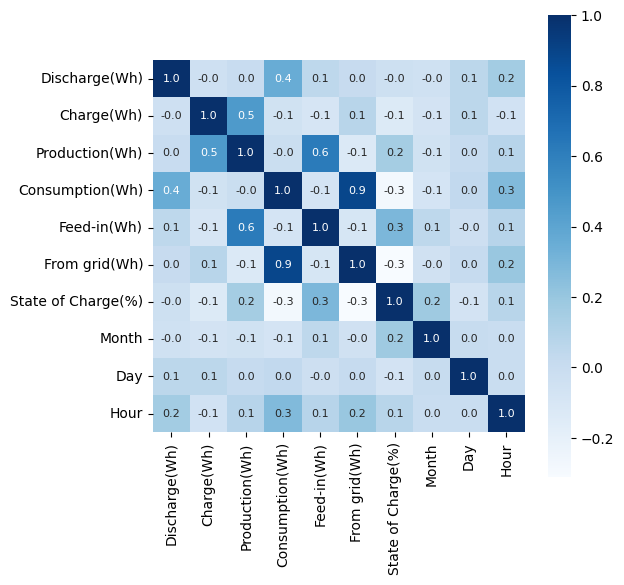

In [26]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation, cbar=True, square= True, fmt= '.1f', annot= True, annot_kws={'size':8}, cmap='Blues')
plt.show()

In [27]:
sns.set(style="whitegrid")

Plot 1: Monthly Production and Consumption patterns

In [28]:
hourly_dataset.columns

Index(['Discharge(Wh)', 'Charge(Wh)', 'Production(Wh)', 'Consumption(Wh)',
       'Feed-in(Wh)', 'From grid(Wh)', 'State of Charge(%)', 'Month', 'Day',
       'Hour'],
      dtype='object')

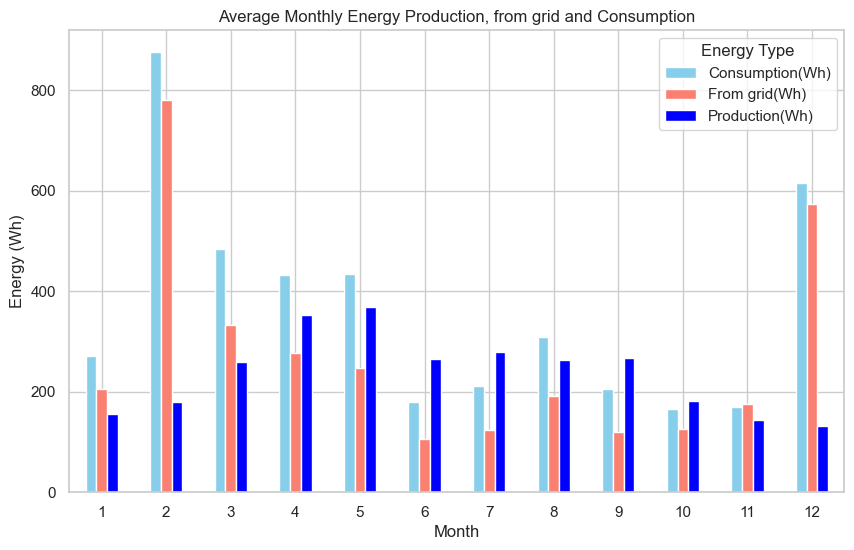

In [29]:
plt.figure(figsize=(10, 6))
monthly_data = hourly_dataset.groupby('Month').mean()[['Consumption(Wh)','From grid(Wh)', 'Production(Wh)']]
monthly_data.plot(kind='bar', stacked=False, color=['skyblue', 'salmon', 'blue'], ax=plt.gca())
plt.title("Average Monthly Energy Production, from grid and Consumption")
plt.xlabel("Month")
plt.ylabel("Energy (Wh)")
plt.xticks(rotation=0)
plt.legend(title="Energy Type")
plt.show()

Hourly Consumption pattern over a day

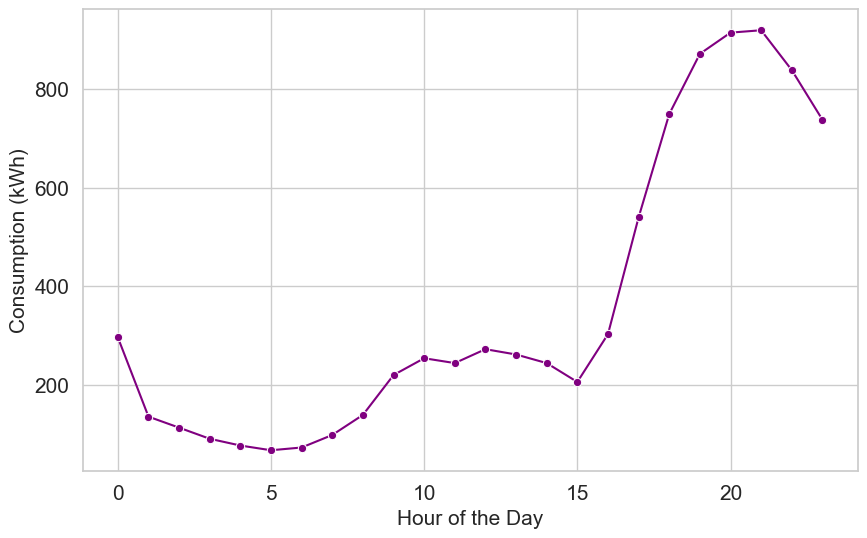

In [82]:
plt.figure(figsize=(10, 6))
hourly_data = hourly_dataset.groupby('Hour').mean()['Consumption(Wh)']
sns.lineplot(x=hourly_data.index, y=hourly_data.values, marker="o", color="purple")
#plt.title("Average Hourly Consumption Pattern")
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.xlabel("Hour of the Day", fontsize= 15)
plt.ylabel("Consumption (kWh)", fontsize= 15)
plt.grid(True)
plt.show()

Monthly Total Feed-in and From Grid

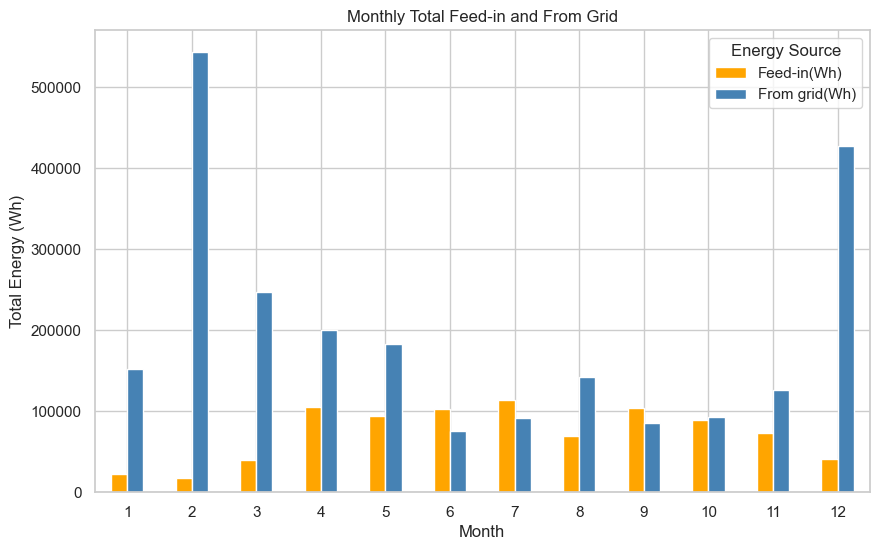

In [31]:
plt.figure(figsize=(10, 6))
monthly_total_feed_grid = hourly_dataset.groupby('Month').sum()[['Feed-in(Wh)', 'From grid(Wh)']]
monthly_total_feed_grid.plot(kind='bar', stacked=False, color=['orange', 'steelblue'], ax=plt.gca())
plt.title("Monthly Total Feed-in and From Grid")
plt.xlabel("Month")
plt.ylabel("Total Energy (Wh)")
plt.xticks(rotation=0)
plt.legend(title="Energy Source")
plt.show()

SPLITING DATA INTO TARGET AND VARIABLES

In [32]:
hourly_dataset.columns

Index(['Discharge(Wh)', 'Charge(Wh)', 'Production(Wh)', 'Consumption(Wh)',
       'Feed-in(Wh)', 'From grid(Wh)', 'State of Charge(%)', 'Month', 'Day',
       'Hour'],
      dtype='object')

In [33]:
X = hourly_dataset.drop(columns= 'Consumption(Wh)', axis=1)
Y = hourly_dataset['Consumption(Wh)']

SPLITING INTO TRAINING AND TESTING DATA

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 2)

In [36]:
X_train.shape, X_test.shape, Y_train.shape

((7027, 9), (1757, 9), (7027,))

MODEL TRAINING

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [38]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV

MODEL TRAINING USING DECISION TREE REGRESSOR

In [39]:
model_dtr = DecisionTreeRegressor()
model_dtr.fit(X_train,Y_train)

DecisionTreeRegressor()

In [40]:
test_prediction = model_dtr.predict(X_test)

In [42]:
test_data_r2 = r2_score(test_prediction,Y_test)
test_data_mae = mean_absolute_error(test_prediction,Y_test)
test_data_mse = mean_squared_error(test_prediction,Y_test)
test_data_mape = mean_absolute_percentage_error(test_prediction,Y_test)
print(f'The test data r2 score: {test_data_r2}')
print(f'The test data mae score: {test_data_mae}')
print(f'The test data mse score: {test_data_mse}')
print(f'The test data mape score: {test_data_mape}')
      

The test data r2 score: 0.9813793719071603
The test data mae score: 34.77148623131152
The test data mse score: 14289.028769443026
The test data mape score: 159279271966307.9


MODEL OPTIMIZATION

In [43]:
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],   # Tree depth
    'min_samples_split': [2, 5, 10, 15],       # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4, 6],          # Minimum samples required at each leaf
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'criterion': ['squared_error', 'friedman_mse']  # Splitting criteria
}

In [44]:
grid_search = GridSearchCV(estimator=model_dtr, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

In [45]:
grid_search.fit(X_train,Y_train)

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
960 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
561 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\U

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='neg_mean_squared_error')

In [46]:
best_param = grid_search.best_params_

In [47]:
best_model_dtr = grid_search.best_estimator_

In [48]:
test_data_prediction = best_model_dtr.predict(X_test)

In [50]:
test_data_r2 = r2_score(test_data_prediction,Y_test)
test_data_mae = mean_absolute_error(test_data_prediction,Y_test)
test_data_mse = mean_squared_error(test_data_prediction,Y_test)
test_data_mape = mean_absolute_percentage_error(test_data_prediction,Y_test)
print(f'The test data r2 score: {test_data_r2}')
print(f'The test data mae score: {test_data_mae}')
print(f'The test data mse score: {test_data_mse}')
print(f'The test data mape score: {test_data_mape}')

The test data r2 score: 0.9482310802266883
The test data mae score: 66.36826343138632
The test data mse score: 39099.45114936251
The test data mape score: 0.3841759252813479


In [51]:
Y_test_list = list(Y_test)

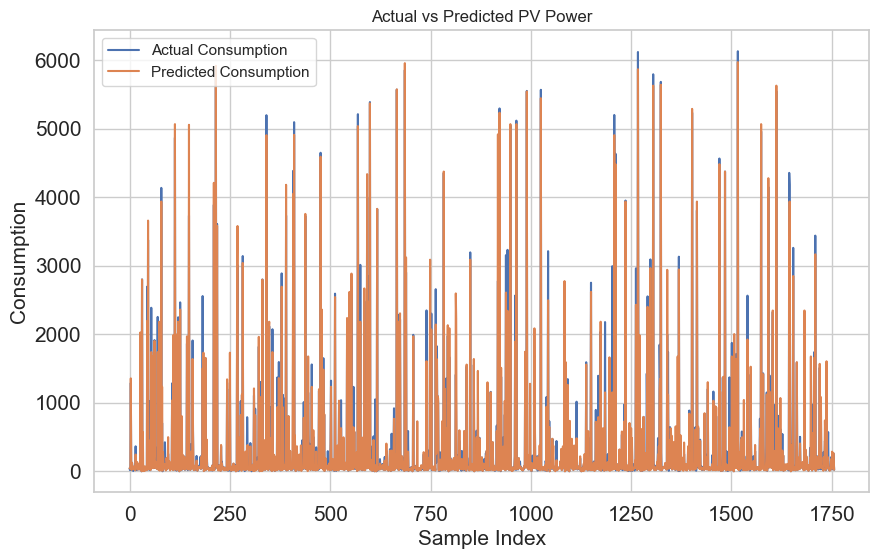

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(Y_test_list, label='Actual Consumption')
plt.plot(test_data_prediction, label='Predicted Consumption')
plt.xlabel('Sample Index', fontsize= 15)
plt.ylabel('Consumption', fontsize= 15)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15) 
plt.title('Actual vs Predicted PV Power')
plt.legend()
plt.show()

MODEL TRAINING GRADIENT BOOSTING REGRESSOR

In [53]:
model_gbr = GradientBoostingRegressor()
model_gbr.fit(X_train,Y_train)

GradientBoostingRegressor()

In [54]:
test_data_prediction = model_gbr.predict(X_test)

In [55]:
test_data_r2 = r2_score(test_data_prediction,Y_test)
test_data_mae = mean_absolute_error(test_data_prediction,Y_test)
test_data_mse = mean_squared_error(test_data_prediction,Y_test)
print(f'The test data r2 score: {test_data_r2}')
print(f'The test data mae score: {test_data_mae}')
print(f'The test data mse score: {test_data_mse}')

The test data r2 score: 0.9920464733476682
The test data mae score: 37.08457662563947
The test data mse score: 5970.513784819612


MODEL OPTIMIZATION

In [56]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [57]:
grid_search = GridSearchCV(estimator= model_gbr, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2', verbose=2)

In [58]:
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

In [59]:
best_param = grid_search.best_params_

In [60]:
best_model_gbr = grid_search.best_estimator_

In [61]:
test_data_prediction= best_model_gbr.predict(X_test)

In [62]:
test_data_r2 = r2_score(test_data_prediction,Y_test)
test_data_mae = mean_absolute_error(test_data_prediction,Y_test)
test_data_mse = mean_squared_error(test_data_prediction,Y_test)
test_data_mape = mean_absolute_percentage_error(test_data_prediction,Y_test)
print(f'The test data r2 score: {test_data_r2}')
print(f'The test data mae score: {test_data_mae}')
print(f'The test data mse score: {test_data_mse}')
print(f'The test data mape score: {test_data_mape}')

The test data r2 score: 0.9966987460078701
The test data mae score: 23.36571394276552
The test data mse score: 2502.8978576471063
The test data mape score: 0.4867287175029063


In [63]:
Y_test_list = list(Y_test)

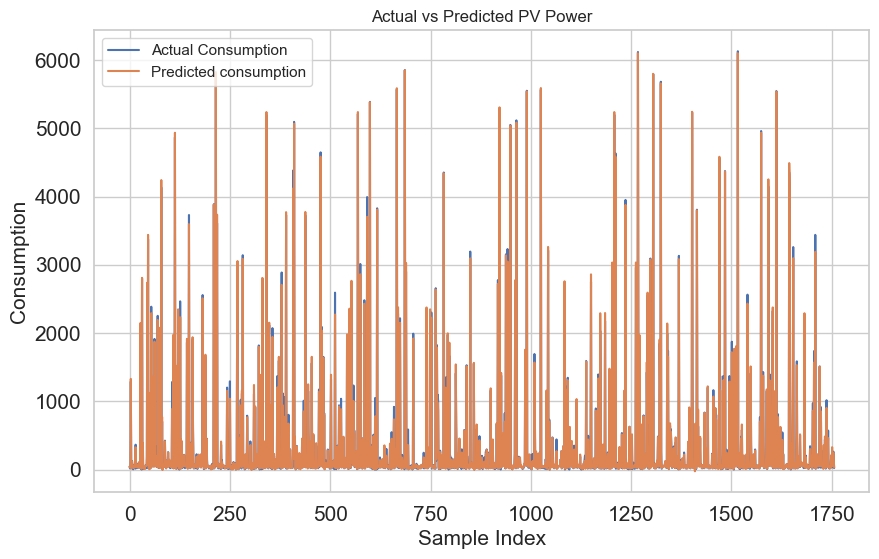

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(Y_test_list, label='Actual Consumption')
plt.plot(test_data_prediction, label='Predicted consumption')
plt.xlabel('Sample Index', fontsize= 15)
plt.ylabel('Consumption', fontsize= 15)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15) 
plt.title('Actual vs Predicted PV Power')
plt.legend()
plt.show()

MODEL TRAINING USING LINEAR REGRESSION

In [65]:
model_lr = LinearRegression()
model_lr.fit(X_train,Y_train)

LinearRegression()

In [66]:
test_data_prediction = model_lr.predict(X_test)

Model Evaluation

In [67]:
test_data_r2 = r2_score(test_data_prediction,Y_test)
test_data_mae = mean_absolute_error(test_data_prediction,Y_test)
test_data_mse = mean_squared_error(test_data_prediction,Y_test)
test_data_mape = mean_absolute_percentage_error(test_data_prediction,Y_test)
print(f'The test data r2 score: {test_data_r2}')
print(f'The test data mae score: {test_data_mae}')
print(f'The test data mse score: {test_data_mse}')
print(f'The test data mape score: {test_data_mape}')

The test data r2 score: 0.9998469164982909
The test data mae score: 2.7960597785040333
The test data mse score: 116.60378591370993
The test data mape score: 0.07643196175744607


Model Optimization

In [68]:
param_grid = {
    'fit_intercept': [True, False] 
}

In [69]:
grid_search = GridSearchCV(estimator=model_lr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

In [70]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [71]:
best_param = grid_search.best_params_

In [72]:
best_model_lr = grid_search.best_estimator_

In [73]:
test_data_prediction = best_model_lr.predict(X_test)

In [74]:
test_data_r2 = r2_score(test_data_prediction,Y_test)
test_data_mae = mean_absolute_error(test_data_prediction,Y_test)
test_data_mse = mean_squared_error(test_data_prediction,Y_test)
test_data_mape = mean_absolute_percentage_error(test_data_prediction,Y_test)
print(f'The test data r2 score: {test_data_r2}')
print(f'The test data mae score: {test_data_mae}')
print(f'The test data mse score: {test_data_mse}')
print(f'The test data mse score: {test_data_mape}')

The test data r2 score: 0.9998470144505912
The test data mae score: 2.771913655480202
The test data mse score: 116.52516310581454
The test data mse score: 0.07660160222081487


In [75]:
Y_test_list = list(Y_test)

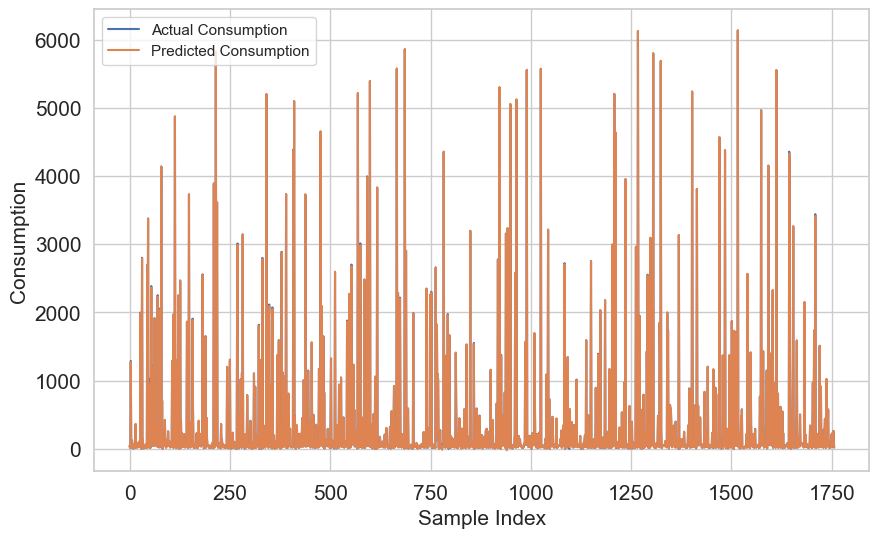

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(Y_test_list, label='Actual Consumption')
plt.plot(test_data_prediction, label='Predicted Consumption')
plt.xlabel('Sample Index', fontsize= 15)
plt.ylabel('Consumption', fontsize= 15)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
#plt.title('Actual vs Predicted PV Power')
plt.legend()
plt.show()

RESULT

In [77]:
test_result = {
    'Model': ['Decision Tree', 'Gradient Boosting', 'Linear Regressor'],
    'R2 Score': [0.9808377836533937,0.9966837952067484,0.9998470144505912],
    'MAE Score': [36.027316305551274, 23.407997089849278, 2.7719136554802133],
}

In [78]:
test_result_df = pd.DataFrame(test_result)

In [79]:
test_result_df

,Model,R2 Score,MAE Score
0,Decision Tree,0.980838,36.027316
1,Gradient Boosting,0.996684,23.407997
2,Linear Regressor,0.999847,2.771914


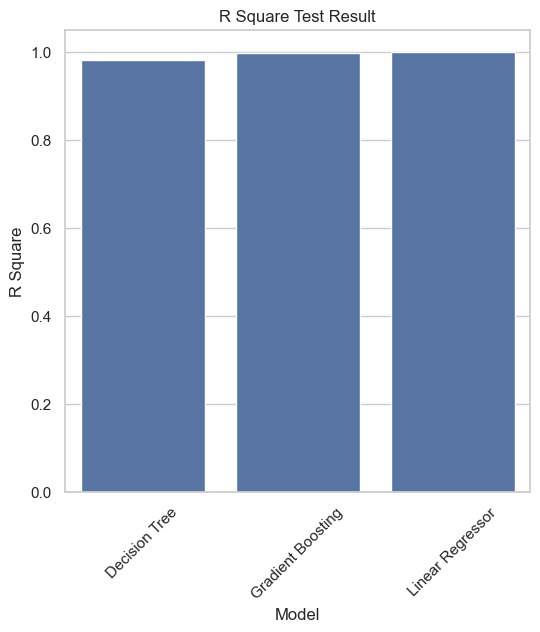

In [80]:
plt.figure(figsize=(6,6))
sns.barplot(x='Model', y='R2 Score', data=test_result)
plt.title('R Square Test Result')
plt.xlabel('Model')
plt.ylabel('R Square')
plt.xticks(rotation=45)
plt.show()

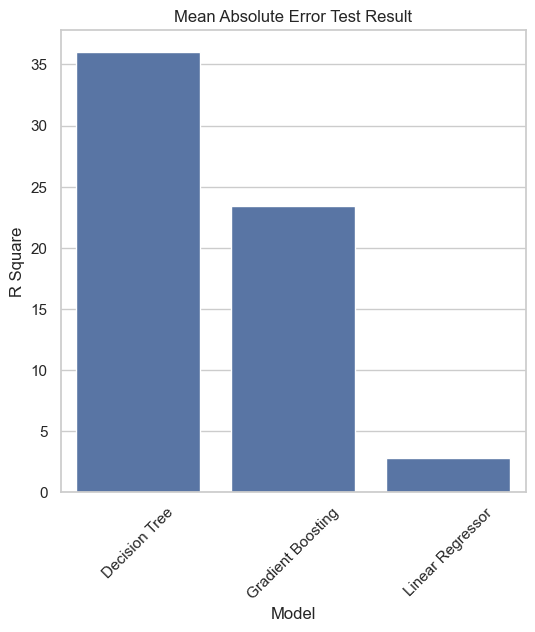

In [81]:
plt.figure(figsize=(6,6))
sns.barplot(x='Model', y='MAE Score', data=test_result)
plt.title('Mean Absolute Error Test Result')
plt.xlabel('Model')
plt.ylabel('R Square')
plt.xticks(rotation=45)
plt.show()